The Lotka-Volterra model, also known as the predator-prey model, is a pair of first-order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The model illustrates how the population sizes of both species fluctuate over time, with the predator population depending on the prey for food and the prey population being controlled by predation. 

In agriculture, this model can be used to simulate the interaction between a crop-damaging pest (prey) and its biological control agents such as parasitoids or predatory insects (predators).  Another application could be in integrated pest management (IPM) programs, where the model helps in devising strategies that maintain pest populations below economic threshold levels by enhancing the population of beneficial predators.

## Equations

$$\frac{dx}{dt} = ax - \beta xy$$

$$\frac{dy}{dt} = \delta x y - \gamma y$$

$x$ is the number of prey (for example, rabbits)

$y$ is the number of some predator (for example, foxes)

$t$ represents time

$\frac{dx}{dt}$ instantaneous growth rate of prey

$\frac{dy}{dt}$ instantaneous growth rate of predator

$\alpha$ natural prey birth rate in the absence of predation

$\beta$ prey death rate due to predation 

$\delta$ predator birth rate (or efficiency of turning prey flesh into predators, or how many caught prey result into a new predator)

$\gamma$ natural predator death rate in the absence of food (prey)

If we discretize the equations (meaning that we deal with a finite amount of time instead of an instant), so that $dt$ becomes $\Delta t$, then the right hand side of the equations represent change (increment or decrement) of the prey and predator in the specified finite amount of time (e.g. 1 day). So, that:

$$dx = (ax - \beta xy) \; \Delta t$$

represents the change of prey. In order to find the total number of prey at time $t$ we simply need to add this change to the existing quantity of prey:

$$x_t = x_{t-1} + (ax_{t-1} - \beta x_{t-1}y_{t-1}) \; \Delta t$$



In [1]:
# Import modules
import matplotlib.pyplot as plt


In [2]:
# Initial predator and prey count
predator = [10]
prey = [100]

# Prey and predator parameters
prey_birth_rate = 0.005 # births per day
prey_death_rate = 0.00015 # deaths per day
predator_birth_rate = 0.00015 # births per day. If value is too high predators will quickly dominate prey
predator_death_rate = 0.01  # deaths per day. When there is no food, predators should die quickly, to let the prey recover

# Time parameters
delta_time = 1 # 1 day
total_time = 3650  # in days


In [3]:
# Run model over defined period
for t in range(1, total_time):
    updated_prey = max(prey[t-1] + delta_time * (prey_birth_rate * prey[t-1]  - prey_death_rate * prey[t-1] * predator[t-1]), 0)    
    updated_predator = max(predator[t-1] + delta_time * (predator_birth_rate * predator[t-1] * prey[t-1] - predator_death_rate * predator[t-1]), 0)
    prey.append(updated_prey)
    predator.append(updated_predator)



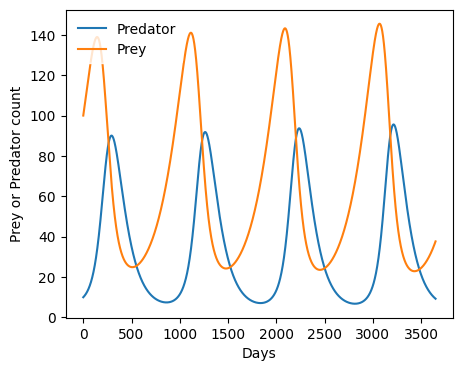

In [5]:
# Create figure
time_points = range(total_time)

plt.figure(figsize=(5,4))
plt.plot(time_points, predator)  
plt.plot(time_points, prey) 
plt.xlabel('Days')
plt.ylabel('Prey or Predator count')
plt.legend(['Predator','Prey'])
plt.rcParams["legend.edgecolor"] = 'w'
plt.show()

## References

Lotka, A.J., 1926. Elements of physical biology. Science Progress in the Twentieth Century (1919-1933), 21(82), pp.341-343.

Volterra, V., 1927. Variazioni e fluttuazioni del numero d'individui in specie animali conviventi (p. 142). C. Ferrari.

You can also learn more at <https://www.wikiwand.com/en/Lotka%E2%80%93Volterra_equations>